In [1]:
import h5py
import os, sys
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
PATH = os.path.join(os.getcwd(),  "prediction", "chromatin-profiles-hdf5")

FILE = "asthma.center.ext.4096bp_predictions.h5"

LABELS_SEI = "asthma.center.ext.4096bp_row_labels.txt"
LABELS_TRUE = "asthma.center.ext.4096bp.bed" # in cwd.


CELL_TYPE = "BEAS-2B_Epithelium_Lung"

ALL_PRED = os.path.join(os.getcwd(), "all_predictions.tsv")
CELL_PRED = os.path.join(os.getcwd(), f"{CELL_TYPE}.all_predictions.tsv")


WRITE_CL_ONLY=True  # write CL or all results? 

In [3]:
def readHdF5(filename, path):
    """
    read hdf5 file, dataset
    
    input
        filename (str) - name of hdf5 results
        path (str) - abs path to directory
        
    require 
        h5py
        
    method 
        1. assemble file
        2. read file
        3. get dataset

    return
        dataset
    
    """
    #1
    file = os.path.join(path, filename) 
    
    #2
    f = h5py.File(file, 'r')
    
    #3
    dset = f['data']

    return dset

In [4]:
def arrayToDF(dset):
    
    df = pd.DataFrame(np.vstack(dset))
    print(df.shape)
    df.columns = getColNames()
    
    return df.T.reset_index()

In [5]:
def getColNames():
    """
    return list of 21097 colnames corresponding to sei prediction features

    input
        none
    method 
        1. make a list for the column names
        2. open the colnames file 
        3. append name to column name list

    return
        colnames (list) - list of column names
    """

    # 1
    colnames = []

    # 2
    COLNAMES = "/wynton/home/ahituv/fongsl/bin/sei-framework/seq_prediction_columns.txt"
    with open(COLNAMES, "r") as reader:
        for line in reader:

            # 3
            colnames.append(line.strip("\n"))

    return colnames

In [6]:
def getCellTypeColNames(colnames, cell_type):
    """
    get cell type-specific column names

    input
        colnames(list) - list of all sei column name predictions
        celltype(str) - name of cell type to search for. 

    method
        1. make empty list to colelect cell type specific column names
        2. iterate through colnames list
        3. check if the cell type string is in the column name. Use .upper() to avoid case-specific errors
        4. append colnames that carry cell type
        
    return 
        celltype_colnames (list) - list of column names in sei predictions matching cell type
    """
    
    #1
    celltype_colnames = []
    
    #2
    for i, name in enumerate(colnames):
        
        #3
        if cell_type.upper() in name.upper():
            
            #4
            celltype_colnames.append(name)
    
    return celltype_colnames

# find cell-type specific column names in sei prediction array

In [7]:
# run get col names function
colnames = getColNames()

# run function to get cell-type-specific column names in sei dataframe
celltype_colnames = getCellTypeColNames(colnames, CELL_TYPE)

# read in raw prediction results

In [8]:
dataset = readHdF5(FILE, PATH)  # open the hdf5 file
hdf = arrayToDF(dataset)  # turn hdf5 dataset into pandas dataframe

hdf.head()

(176, 21907)


,index,0,1,2,3,4,5,6,7,8,...,166,167,168,169,170,171,172,173,174,175
0,HeLa_Epithelium_Cervix|BTAF1|ID:1,0.000184,0.000005,0.000013,0.000027,0.000010,0.000375,0.000013,0.000009,0.000031,...,0.000042,0.000013,0.000022,0.000029,0.000005,0.000016,0.000003,0.000261,0.000039,0.000249
1,H9_Embryonic_Stem_Cell_Embryo|EOMES|ID:1006,0.549423,0.000398,0.000469,0.037800,0.000247,0.076880,0.000525,0.002660,0.003206,...,0.058809,0.037605,0.009402,0.004349,0.001014,0.384242,0.002292,0.003298,0.016957,0.663384
2,H9_Embryonic_Stem_Cell_Embryo|EP300|ID:1007,0.206583,0.000001,0.000062,0.490600,0.000005,0.127258,0.000272,0.000036,0.000801,...,0.012580,0.084326,0.026345,0.000031,0.000349,0.000664,0.000913,0.000084,0.000305,0.835058
3,H9_Embryonic_Stem_Cell_Embryo|FOXH1|ID:1010,0.170696,0.000129,0.000702,0.009123,0.000447,0.006417,0.001384,0.000288,0.003434,...,0.041036,0.017805,0.015097,0.000678,0.001160,0.171171,0.001760,0.001699,0.018939,0.224910
4,H9_Embryonic_Stem_Cell_Embryo|FOXH1|ID:1011,0.055684,0.000031,0.000095,0.102048,0.000022,0.007417,0.001000,0.000059,0.001905,...,0.002142,0.022365,0.011997,0.000029,0.000935,0.001272,0.000991,0.000223,0.001026,0.278466


# filter for cell-type-specific predictions 

In [9]:
# filter by celltype_colnames, set index to index, and transpose dataframe to longform
celldf = hdf.loc[hdf["index"].isin(celltype_colnames)].copy()

celldf.head()

,index,0,1,2,3,4,5,6,7,8,...,166,167,168,169,170,171,172,173,174,175
6497,BEAS-2B_Epithelium_Lung|H3K4me3|ID:48473,0.003516,0.000183,0.000014,0.000001,0.000009,0.000018,0.005830,1.192292e-06,0.028920,...,0.000014,0.000268,0.000120,1.140192e-07,0.000010,0.000107,0.000011,0.000040,0.000075,0.000723
6498,BEAS-2B_Epithelium_Lung|H3K4me3|ID:48474,0.001601,0.000078,0.000018,0.000001,0.000008,0.000017,0.009627,9.249644e-07,0.014933,...,0.000013,0.000513,0.000131,9.995245e-08,0.000014,0.000066,0.000010,0.000017,0.000042,0.001058
6499,BEAS-2B_Epithelium_Lung|H3K9me2|ID:48475,0.000012,0.000003,0.000095,0.000029,0.000002,0.000005,0.000031,9.199335e-06,0.000006,...,0.000014,0.000026,0.000013,1.918484e-06,0.000016,0.000017,0.000013,0.000003,0.000078,0.000009
6500,BEAS-2B_Epithelium_Lung|H3K27me3|ID:48477,0.005622,0.000515,0.000128,0.000170,0.000096,0.000325,0.000023,3.319556e-04,0.037858,...,0.001859,0.008811,0.018040,3.536375e-05,0.000247,0.000469,0.000785,0.000136,0.001833,0.006635
6501,BEAS-2B_Epithelium_Lung|H3K27me3|ID:48478,0.009591,0.000158,0.000073,0.000121,0.000046,0.000336,0.000029,1.947948e-04,0.024895,...,0.001265,0.003705,0.010913,1.620678e-05,0.000201,0.000207,0.000307,0.000049,0.000368,0.000830


# turn cell df into long form

In [18]:
if WRITE_CL_ONLY is True:
    longdf = pd.melt(celldf, id_vars="index", var_name = "sampleId", value_name="featurePred")
else:
    longdf = pd.melt(hdf, id_vars="index", var_name = "sampleId", value_name="featurePred")
print(longdf.shape)
longdf.head()

(3344, 3)


,index,sampleId,featurePred
0,BEAS-2B_Epithelium_Lung|H3K4me3|ID:48473,0,0.003516
1,BEAS-2B_Epithelium_Lung|H3K4me3|ID:48474,0,0.001601
2,BEAS-2B_Epithelium_Lung|H3K9me2|ID:48475,0,0.000012
3,BEAS-2B_Epithelium_Lung|H3K27me3|ID:48477,0,0.005622
4,BEAS-2B_Epithelium_Lung|H3K27me3|ID:48478,0,0.009591


In [19]:
# add feature columns
longdf["celltype"] = longdf["index"].apply(lambda x: x.split("|")[0])
longdf["feature"] = longdf["index"].apply(lambda x: x.split("|")[1])
longdf["feature_id"] = longdf["index"].apply(lambda x: x.split("|")[2])

longdf["sampleId"] =longdf["sampleId"].astype(int)  # change datatype
longdf.head()

,index,sampleId,featurePred,celltype,feature,feature_id
0,BEAS-2B_Epithelium_Lung|H3K4me3|ID:48473,0,0.003516,BEAS-2B_Epithelium_Lung,H3K4me3,ID:48473
1,BEAS-2B_Epithelium_Lung|H3K4me3|ID:48474,0,0.001601,BEAS-2B_Epithelium_Lung,H3K4me3,ID:48474
2,BEAS-2B_Epithelium_Lung|H3K9me2|ID:48475,0,0.000012,BEAS-2B_Epithelium_Lung,H3K9me2,ID:48475
3,BEAS-2B_Epithelium_Lung|H3K27me3|ID:48477,0,0.005622,BEAS-2B_Epithelium_Lung,H3K27me3,ID:48477
4,BEAS-2B_Epithelium_Lung|H3K27me3|ID:48478,0,0.009591,BEAS-2B_Epithelium_Lung,H3K27me3,ID:48478


## add sei sample labels 

In [20]:
sample_labels = {}

# read sample_label file, turn into dictionary
with open(os.path.join(PATH, LABELS_SEI), "r") as reader:
    for line in reader:
        if "index" not in line:
            i, coor = line.strip('\n').split("\t")
            sample_labels[i] = coor

# turn dictionary into dataframe
labels_sei = pd.DataFrame(sample_labels.items(), columns = ["sampleId", "coor"])

labels_sei.head()

,sampleId,coor
0,0,chr12:102476624-102480721
1,1,chr11:112423348-112427445
2,2,chr3:170274132-170278229
3,3,chr4:83360066-83364163
4,4,chr4:183749012-183753109


## add provided sample labels

In [21]:
truth_labels = {}

# read sample_label file, turn into dictionary
with open(os.path.join(os.getcwd(), LABELS_TRUE), "r") as reader:
    for line in reader:
        if "index" not in line:
            chr_, start, stop, i = line.strip('\n').split("\t")
            coor = chr_ + ":" + str(start) +  '-' + str(stop)
            
            truth_labels[coor] = i

# turn dictionary into dataframe
labels_true = pd.DataFrame(truth_labels.items(), columns = ["coor", "true_label"])

labels_true.head()

,coor,true_label
0,chr12:102476624-102480721,UP_CTRL
1,chr11:112423348-112427445,UP_CTRL
2,chr3:170274132-170278229,UP_CTRL
3,chr4:83360066-83364163,UP_CTRL
4,chr4:183749012-183753109,UP_CTRL


## merge sei and true labels

In [22]:
labels = pd.merge(labels_sei, labels_true)
labels["sampleId"]=labels["sampleId"].astype(int) 
labels["sample_true_label"]=labels["true_label"] +"-"+ labels["sampleId"].astype(str) 
labels.head()

,sampleId,coor,true_label,sample_true_label
0,0,chr12:102476624-102480721,UP_CTRL,UP_CTRL-0
1,1,chr11:112423348-112427445,UP_CTRL,UP_CTRL-1
2,2,chr3:170274132-170278229,UP_CTRL,UP_CTRL-2
3,3,chr4:83360066-83364163,UP_CTRL,UP_CTRL-3
4,4,chr4:183749012-183753109,UP_CTRL,UP_CTRL-4


In [23]:
df = pd.merge(longdf, labels, how = "left", on="sampleId")
df.head()

,index,sampleId,featurePred,celltype,feature,feature_id,coor,true_label,sample_true_label
0,BEAS-2B_Epithelium_Lung|H3K4me3|ID:48473,0,0.003516,BEAS-2B_Epithelium_Lung,H3K4me3,ID:48473,chr12:102476624-102480721,UP_CTRL,UP_CTRL-0
1,BEAS-2B_Epithelium_Lung|H3K4me3|ID:48474,0,0.001601,BEAS-2B_Epithelium_Lung,H3K4me3,ID:48474,chr12:102476624-102480721,UP_CTRL,UP_CTRL-0
2,BEAS-2B_Epithelium_Lung|H3K9me2|ID:48475,0,0.000012,BEAS-2B_Epithelium_Lung,H3K9me2,ID:48475,chr12:102476624-102480721,UP_CTRL,UP_CTRL-0
3,BEAS-2B_Epithelium_Lung|H3K27me3|ID:48477,0,0.005622,BEAS-2B_Epithelium_Lung,H3K27me3,ID:48477,chr12:102476624-102480721,UP_CTRL,UP_CTRL-0
4,BEAS-2B_Epithelium_Lung|H3K27me3|ID:48478,0,0.009591,BEAS-2B_Epithelium_Lung,H3K27me3,ID:48478,chr12:102476624-102480721,UP_CTRL,UP_CTRL-0


In [16]:
df["#chr"] = df["coor"].apply(lambda x: x.split(":")[0])
df["start"] = df["coor"].apply(lambda x: (x.split(":")[1]).split("-")[0])
df["end"] = df["coor"].apply(lambda x: x.split("-")[1])

## write cell line file

In [25]:
cols = ["#chr", "start", "end",
        'coor',
        'index',
        # 'sampleId',
        'featurePred',
        'celltype',
        'feature',
        'feature_id',
        'true_label',
        # 'sample_true_label'
        ]

if WRITE_CL_ONLY is True:
    df.to_csv(CELL_PRED, sep='\t', index=False)
else:
    df.to_csv(ALL_PRED, sep='\t', index=False)

In [26]:
df.head()

,index,sampleId,featurePred,celltype,feature,feature_id,coor,true_label,sample_true_label
0,BEAS-2B_Epithelium_Lung|H3K4me3|ID:48473,0,0.003516,BEAS-2B_Epithelium_Lung,H3K4me3,ID:48473,chr12:102476624-102480721,UP_CTRL,UP_CTRL-0
1,BEAS-2B_Epithelium_Lung|H3K4me3|ID:48474,0,0.001601,BEAS-2B_Epithelium_Lung,H3K4me3,ID:48474,chr12:102476624-102480721,UP_CTRL,UP_CTRL-0
2,BEAS-2B_Epithelium_Lung|H3K9me2|ID:48475,0,0.000012,BEAS-2B_Epithelium_Lung,H3K9me2,ID:48475,chr12:102476624-102480721,UP_CTRL,UP_CTRL-0
3,BEAS-2B_Epithelium_Lung|H3K27me3|ID:48477,0,0.005622,BEAS-2B_Epithelium_Lung,H3K27me3,ID:48477,chr12:102476624-102480721,UP_CTRL,UP_CTRL-0
4,BEAS-2B_Epithelium_Lung|H3K27me3|ID:48478,0,0.009591,BEAS-2B_Epithelium_Lung,H3K27me3,ID:48478,chr12:102476624-102480721,UP_CTRL,UP_CTRL-0


In [27]:
df.describe()

,sampleId,featurePred
count,3344.000000,3.344000e+03
mean,87.500000,1.945581e-02
std,50.813602,9.462170e-02
min,0.000000,3.993581e-08
25%,43.750000,1.241961e-05
50%,87.500000,1.180488e-04
75%,131.250000,1.398091e-03
max,175.000000,9.990473e-01


In [ ]:
fig, ax = plt.subplots(figsize=(6, 12))
hue_order = ["DOWN", "DOWN_CTRL",  "UP", "UP_CTRL",]

y, x = "feature", "featurePred"
data = df
data['joint_feature_id'] = data["feature"] + "-"+data["feature_id"] 
hue = "true_label"
sns.stripplot(x=x, y=y, data=data,
              hue=hue, hue_order=hue_order,
              dodge=True,
              palette="tab20"
              )

ax.legend(bbox_to_anchor=(1.35, 1))
ax.set(xlabel="sei predicted probability",
       title="asthma set n=176"
       )

out = os.path.join(os.getcwd(), "sei_pred_asthma_176_stripplot.pdf")
plt.savefig(out, bbox_inches="tight")

In [28]:
means = df.groupby(["sampleId", "true_label", "feature", "sample_true_label"])["featurePred"].mean().reset_index()

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
hue_order = [ "UP", "UP_CTRL", "DOWN", "DOWN_CTRL", ]


data = df.sort_values(by="sample_true_label")

hue = "feature"

x,y= "true_label", "featurePred"

#data[y] =data[y].map(str) 

sns.stripplot(x=x, y=y, data=means,
              hue=hue, 
              order=hue_order,
              dodge=True,
              palette="tab20"
              )

ax.legend(bbox_to_anchor=(1.35, 1))#.remove()
ax.set(xlabel="true label",
       ylabel="sei predicted probability (mean)",
       title=f"asthma set n=176"
       )

out = os.path.join(os.getcwd(), "sei_pred_asthma_true_label_mean.pdf")
plt.savefig(out, bbox_inches="tight")

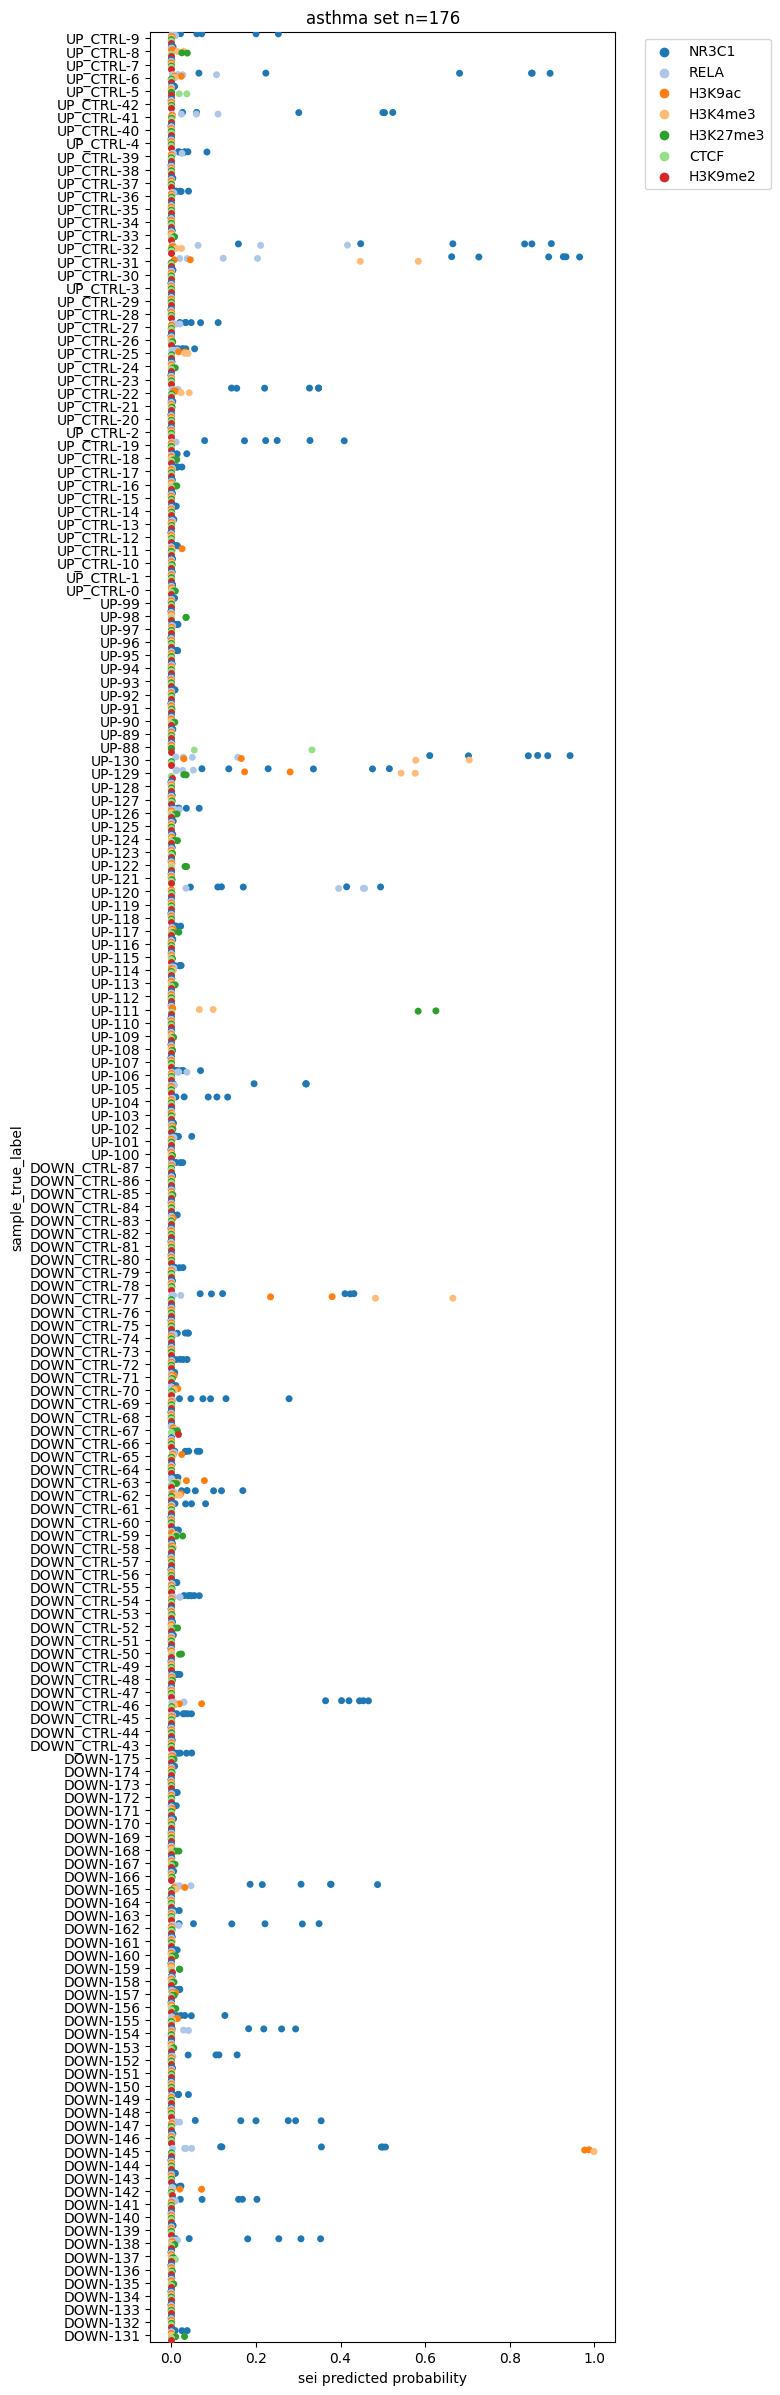

In [29]:
fig, ax = plt.subplots(figsize=(6, 30))
#hue_order = ["DOWN", "DOWN_CTRL",  "UP", "UP_CTRL",]


data = df.sort_values(by=["sample_true_label", "featurePred"], ascending = False)

hue = "feature"

y, x = "sample_true_label", "featurePred"

data[y] =data[y].map(str) 

sns.stripplot(x=x, y=y, data=data,
              hue=hue, 
              #hue_order=hue_order,
              dodge=True,
              palette="tab20"
              )

ax.legend(bbox_to_anchor=(1.35, 1))#.remove()
ax.set(xlabel="sei predicted probability",
       title=f"asthma set n=176"
       )

out = os.path.join(os.getcwd(), "sei_pred_asthma_176_stripplot_each_seq.pdf")
plt.savefig(out, bbox_inches="tight")

In [ ]:
df.sort_values(by=["feature"])
table = pd.pivot(df, index=["sampleId", "true_label"], columns=[
                 "feature", "feature_id"], values="featurePred")
table

In [ ]:

table_means = pd.pivot(means, index=["sampleId", "true_label"], columns=[
                 "feature"], values="featurePred")
table_means

In [ ]:
sns.set(font_scale=1.2)

In [ ]:
sns.clustermap(table, 
               #cmap="Blues",
               col_cluster=True, figsize=(10, 60))
out = os.path.join(os.getcwd(), "sei_pred_asthma_clustered_feature_id.pdf")
plt.savefig(out, bbox_inches="tight")

In [ ]:
sns.clustermap

In [ ]:
sns.clustermap(table_means, 
               #cmap="Blues",
               col_cluster=True, figsize=(10, 60))
out = os.path.join(os.getcwd(), "sei_pred_asthma_clustered_mean_feature.pdf")
plt.savefig(out, bbox_inches="tight")

In [ ]:
labels.groupby("true_label")["sampleId"].count()

In [ ]:
df[["feature", "feature_id"]].drop_duplicates().groupby(["feature"])["feature_id"].count()